# Data
The file is a file representation of "ping" data for an app for the month of February 2016. It has about 4.8M rows, so it is quite big. When the app is opened by a user, the app pings the analytics system. A user may ping multiple times in a day.

The data has 5 columns: 
- date: date of the ping
- timestamp: ping timestamp
- uid: unique id assigned to users (if the string is purely numeric, this means the user is registered, otherwise it's a device id)
- isFirst: true if this is the user's first ping ever (some users have been using the app before February)
- utmSource: traffic source from which the user came

The dates are based on Pacific time. So, for example, the minimum timestamp corresponds to midnight February 1st in Pacific time, not GMT.

# Exercise
1. Show the daily active users over the month, including all users. A user is considered active if they pinged at least once on a given day.
2. Calculate the daily retention curve for users who used the app for the first time on the following dates: Feb 4th, Feb 10th, and Feb 14th. Also, show the number of users from each cohort. Daily retention curve is defined as the % of users from the cohort, who used the product that day.
3. Determine if there are any differences in usage based on where the users came from. From which traffic source does the app get its best users? Its worst users?
4. Separate from the data analysis, it would be great to hear your thoughts on the Grammarly product and what data-related projects/ideas you think we should be pursuing.

# Solution

1. The app is gaining popularity as a growing number of users are accessing it. 
    - Steady new user growth
    - Most of users are registered users, and those users’ DAU also have an upward trend
    - DAU has weekly seasonality (more active users during weekday and less users at weekend)

2. Losing half users after one week of acquiring
    - About 3000 users launched the app on 02-04, 02-10, and 02-14 each.
        - Day 1 retention rate: 54% - 61%
        - Day 7 retention rate:  43%-49%
        - Day 14 retention rate: 38% - 46%
     - The retention curve begins to flatten out after day 10, about 34%-44% users are retained
     - Among the three cohorts, 2016-02-04 cohort performs the worst.
3. Biznesowe+Rewolucje has the most and best users
    - Top 10 sources account for 98.56% of active users
        - Top 1 - unknown sources - 41%
        - Top 2 - Biznesowe+Rewolucje - 34%
        - Top 3 - program - 6.6%
    - Best users: Biznesowe+Rewolucje,  unknown source, and answers, Mosalingua+FR
    - Worst users: program and the rest
    
4. Potential future analysis
    - User growth 
        - MAU, DAU/MAU ratio
        - The time spent by users
        - The demographics of users to better understand who are main users of Grammarly products and where we can acquire more similar users.
    - Revenue growth
        - Grammarly premium subscription renewal rate
        - Compare lifetime value to the cost of acquiring customers
        - Segment analysis, such as tracking which traffic sources are driving the most sales, or identifying top converting traffic sources.


In [1]:
#import neccessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# change default figure and font size
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['font.size'] = 12
# pd.set_option('display.float_format', lambda x: '%.3f' % x)   
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)
# pd.set_option('max_colwidth',100)


In [2]:
df = pd.read_json('grammarly_data_exercise.json')

In [3]:
df.shape

(4823567, 5)

In [4]:
df.head()

,date,timestamp,uid,isFirst,utmSource
0,2016-02-29,2016-02-29 08:00:01.255,g4Hjpoji4dmv,False,Biznesowe+Rewolucje
1,2016-02-29,2016-02-29 08:00:01.556,g4Hjpoji4dmv,False,Biznesowe+Rewolucje
2,2016-02-29,2016-02-29 08:00:01.770,75121338,False,program
3,2016-02-29,2016-02-29 08:00:03.129,11l0tD2wFPFO,False,None
4,2016-02-29,2016-02-29 08:00:03.610,56429432,False,None


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4823567 entries, 0 to 4823566
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   date       datetime64[ns]
 1   timestamp  datetime64[ns]
 2   uid        object        
 3   isFirst    bool          
 4   utmSource  object        
dtypes: bool(1), datetime64[ns](2), object(2)
memory usage: 151.8+ MB


In [6]:
# convert to formated date string
#df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['date'] = df['date'].apply(lambda x: x.strftime('%Y-%m-%d'))
#df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')


In [7]:
print(df['date'].min())
print(df['date'].max())

2016-02-01
2016-02-29


In [8]:
# create new column "registered", an indicator of whehter this user is registered or not
df['registered'] = df['uid'].str.isnumeric()


In [9]:
# check missing values
df.isnull().sum()

date                0
timestamp           0
uid                 0
isFirst             0
utmSource     1674386
registered          0
dtype: int64

### 1. Daily Active Users

In [10]:
# daily active all users
daily_active_users = df.groupby('date')['uid'].nunique()


In [11]:
# daily active registered users
daily_active_registered_users = df[df['registered']==True].groupby('date')['uid'].nunique()


In [12]:
# daily active new users
daily_new_users = df[df['isFirst']==True].groupby('date')['uid'].nunique()


In [13]:
# daily returning users
daily_returning_users = df[df['isFirst']==False].groupby('date')['uid'].nunique()

In [14]:
# active new users since Feb
feb_users =  df[df['isFirst']==True]['uid'].unique()

feb_users_df = df[df['uid'].isin(feb_users)]

daily_active_feb_users = feb_users_df.groupby('date')['uid'].nunique()

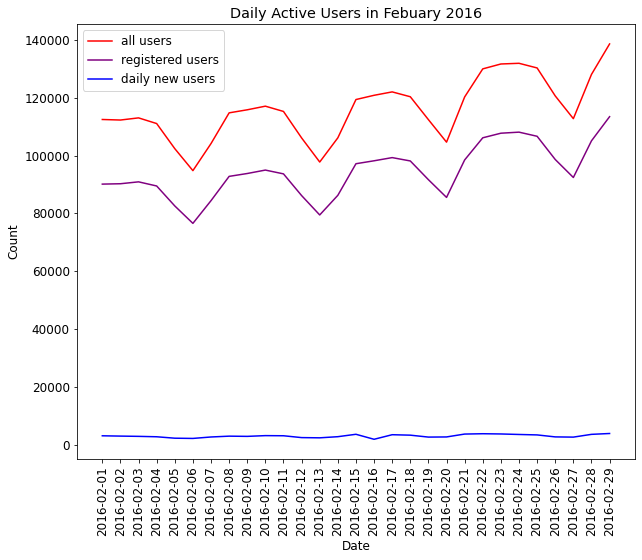

In [15]:
plt.plot(daily_active_users,color='red',label='all users')
plt.plot(daily_active_registered_users, color = 'purple',label='registered users')
plt.plot(daily_new_users, color = 'blue',label='daily new users')
# plt.plot(daily_returning_users, color='green', label= 'daily returning users')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Active Users in Febuary 2016')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Febuarary new users is quite active everyday; Both DAU for all users and daily active registered users have an upward trend, largely due to increased new users in Feb. Also DAU has weekly seasonality (More users during weekday and less users at weekend)

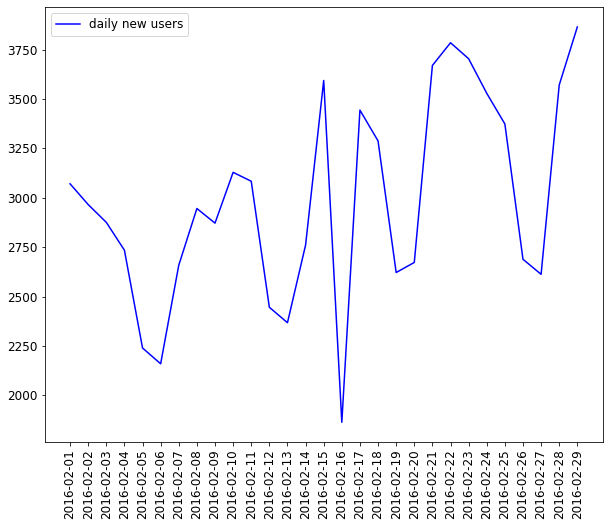

In [16]:
plt.plot(daily_new_users, color = 'blue',label='daily new users')
plt.xticks(rotation=90)
plt.legend()
plt.show()

### 2. Daily Retention Curve 

In [17]:
# group the data and select the earliest instance in the data
df['cohort_group'] = df.groupby('uid')['date'].transform('min')

In [18]:
df.head()

,date,timestamp,uid,isFirst,utmSource,registered,cohort_group
0,2016-02-29,2016-02-29 08:00:01.255,g4Hjpoji4dmv,False,Biznesowe+Rewolucje,False,2016-02-02
1,2016-02-29,2016-02-29 08:00:01.556,g4Hjpoji4dmv,False,Biznesowe+Rewolucje,False,2016-02-02
2,2016-02-29,2016-02-29 08:00:01.770,75121338,False,program,True,2016-02-25
3,2016-02-29,2016-02-29 08:00:03.129,11l0tD2wFPFO,False,None,False,2016-02-20
4,2016-02-29,2016-02-29 08:00:03.610,56429432,False,None,True,2016-02-02


In [19]:
# find all first timers
cohort_ids = df[(df['isFirst']==True)]['uid'].unique()

# create cohort groups based on first ping date 
new_users = df[df['uid'].isin(cohort_ids)]

In [20]:
# count the unique active users per cohort_period + date
cohorts = new_users.groupby(['cohort_group', 'date']).agg({'uid': pd.Series.nunique})

# rename the column
cohorts = cohorts.rename(columns = {'uid': 'total_active_users'})

In [21]:
# creates a 'cohort_period' column, which is the Nth period based on the user's first ping.
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

In [22]:
cohorts = cohorts.groupby('cohort_group').apply(cohort_period)
cohorts.head()

total_active_users  cohort_period
cohort_group date                                         
2016-02-01   2016-02-01                3071              1
             2016-02-02                1839              2
             2016-02-03                1656              3
             2016-02-04                1537              4
             2016-02-05                1338              5

In [23]:
# re-index
cohorts = cohorts.reset_index()
cohorts = cohorts.set_index(['cohort_group', 'cohort_period'])
cohorts.head()

date  total_active_users
cohort_group cohort_period                                
2016-02-01   1              2016-02-01                3071
             2              2016-02-02                1839
             3              2016-02-03                1656
             4              2016-02-04                1537
             5              2016-02-05                1338

In [24]:
# create a Series holding the total size of each cohort group
cohorts_size = cohorts['total_active_users'].groupby(level = 'cohort_group').first()
cohorts_size.head()


cohort_group
2016-02-01    3071
2016-02-02    2966
2016-02-03    2876
2016-02-04    2735
2016-02-05    2240
Name: total_active_users, dtype: int64

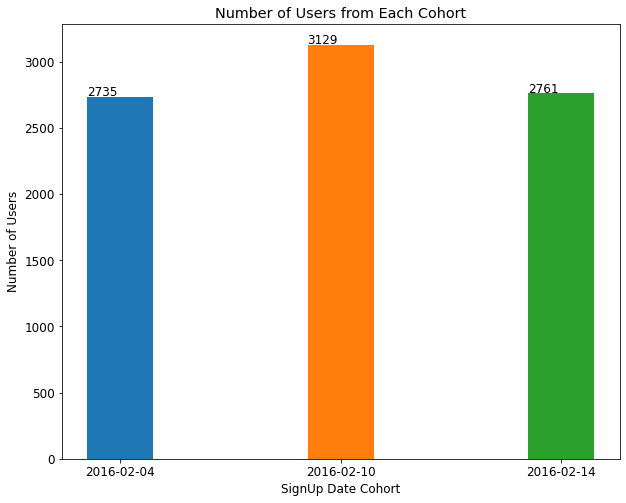

In [25]:
# the number of users from each cohort
dates = ['2016-02-04', '2016-02-10', '2016-02-14']
cohorts_size[dates]
bars = plt.bar(dates, height=cohorts_size[dates], width=.3,
              color=['tab:blue', 'tab:orange', 'tab:green'])

# annotatae
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+8, yval)
    
plt.xlabel('SignUp Date Cohort')
plt.ylabel('Number of Users')
plt.title('Number of Users from Each Cohort')
plt.show()

In [26]:
# unstack the cohorts df, so that a column represents a cohort group, and each row is the cohort period corresponding to that group.
# then divide the total_active_users in cohorts by cohort_size.
user_retention_rate = cohorts['total_active_users'].unstack('cohort_group').divide(cohorts_size, axis = 1)
user_retention_rate.head()


cohort_group,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,...,2016-02-20,2016-02-21,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-27,2016-02-28,2016-02-29
cohort_period,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.598828,0.589009,0.585883,0.544790,0.516964,0.558333,0.603986,0.618466,0.596797,0.605625,...,0.625140,0.657221,0.639630,0.648218,0.635024,0.578245,0.551506,0.629162,0.632596,NaN
3,0.539238,0.515172,0.496175,0.439488,0.483929,0.514815,0.553968,0.548880,0.517758,0.506871,...,0.565282,0.597548,0.579657,0.568844,0.534712,0.485181,0.527334,0.564485,NaN,NaN
4,0.500488,0.437289,0.416898,0.462888,0.496875,0.453704,0.526890,0.487101,0.432103,0.437200,...,0.540217,0.562670,0.537384,0.488121,0.474072,0.505039,0.532168,NaN,NaN,NaN
5,0.435689,0.397505,0.436370,0.480073,0.469643,0.445833,0.487401,0.447726,0.371518,0.463726,...,0.520389,0.538965,0.468428,0.446544,0.512893,0.536752,NaN,NaN,NaN,NaN


In [27]:
# user retention for users that used the app for the first time on Feb 4th, Feb 10th, and Feb 14th
user_retention_rate[dates]

cohort_group,2016-02-04,2016-02-10,2016-02-14
cohort_period,,,
1,1.000000,1.000000,1.000000
2,0.544790,0.605625,0.609200
3,0.439488,0.506871,0.550525
4,0.462888,0.437200,0.515031
5,0.480073,0.463726,0.474828
6,0.440951,0.494407,0.437523
7,0.437660,0.487696,0.429917
8,0.432907,0.483221,0.474104
9,0.371846,0.452221,0.457443


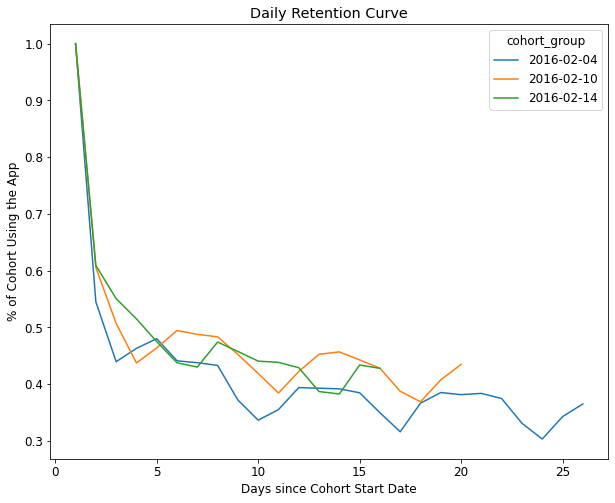

In [28]:
# plot the cohorts over time
user_retention_rate[dates].plot()
plt.xlabel('Days since Cohort Start Date')
plt.ylabel('% of Cohort Using the App')
plt.title('Daily Retention Curve')
plt.show()


Unsurprisingly, fewer users tend to use the app as time goes on. Among the three cohorts, 2016-02-44 cohort performs the worst. About 40%-50% of users stopped using the app one day after they signup. After 10 days since signup, 34%-44% users remain active. The retention curve begins to level off after the 10th day. 

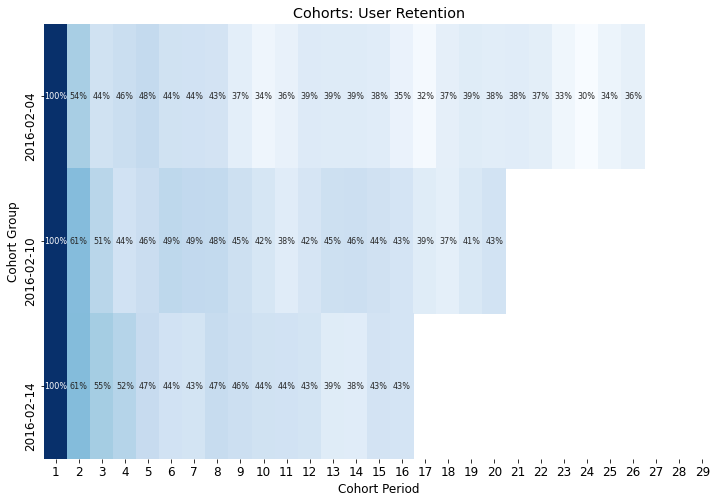

In [29]:
plt.figure(figsize = (12, 8))
sns.heatmap(user_retention_rate[dates].T,
            cmap = plt.cm.Blues,
            mask = user_retention_rate[dates].T.isnull(),  # data will not be shown where it's True
            annot = True,  # annotate the text on top
            fmt = '.0%',
           annot_kws={"size": 8},
            cbar=False )  
plt.title('Cohorts: User Retention')
plt.xlabel('Cohort Period')
plt.ylabel('Cohort Group')
plt.show()


### 3. Traffic Source Analysis
Determine if there are any differences in usage based on where the users came from. From which traffic source does the app get its best users? Its worst users?

In [30]:
# check missing sources
print(df['utmSource'].isnull().sum())
print('percent of missing: ', df['utmSource'].isnull().sum()/df.shape[0])

1674386
percent of missing:  0.34712609983441717


In [31]:
df.utmSource.fillna('unknown', inplace=True)

In [32]:
df['utmSource'].value_counts()
print(df.utmSource.value_counts().count())

53


Traffic source has high cardinality.  We have 53 distinct categories of sources. There are some misspelling, catipalized, or similar words.
1. twitter, Twitter_org
2. Bing, bing
3. facebook.com, facebook, Facebook_org 
4. blog, Blog_org
5. shmoop_left, shmoop_right, shmoop_logo 
6. email-sendgrid, sendgrid.com   

In [33]:
# fix sources
def fix_source(source):
    if source in ['twitter', 'Twitter_org']:
        return 'Twitter' 
    elif source in ['Bing', 'bing']:
        return 'Bing'
    elif source in ['facebook.com', 'facebook', 'Facebook_org']:
        return 'Facebook'
    elif source in ['blog', 'Blog_org']:
        return 'Blog'
    elif source in ['shmoop_left', 'shmoop_right', 'shmoop_logo']:
        return 'shmoop'
    elif source in ['email-sendgrid', 'sendgrid.com']:
        return 'sendgrid'
    else:
        return source

In [34]:
df['utmSource'] = df.apply(lambda row: fix_source(row['utmSource']), axis=1)


In [35]:
df.utmSource.value_counts().count()

45

In [36]:
# number of active users by source
users_by_source = df.groupby("utmSource")['uid'].nunique().sort_values(ascending=False)
users_by_source

utmSource
unknown                            103137
Biznesowe+Rewolucje                 86287
program                             16493
answers                             14979
shmoop                               6915
MosaLingua+FR                        6345
Twitter                              5152
other                                4417
Grub+Street                          2431
handbook                             1158
salesmanago                          1122
Just-In-Time+Travels+Newsletter       515
youtube                               458
tapjoy                                347
dict                                  342
placement                             264
contenthub                            182
Facebook                              140
liveintent                             89
Blog                                   45
Wise+Ink+Master+Email+List             31
google                                 28
TrialIntro                              9
MembershipCancellation  

In [37]:
# calculating the sum of the users
total_users = users_by_source.sum()

# normalizing 
users_by_source_pct=users_by_source.apply(lambda x: 100*x/total_users)

print(users_by_source_pct)

utmSource
unknown                            41.101246
Biznesowe+Rewolucje                34.386333
program                             6.572645
answers                             5.969299
shmoop                              2.755705
MosaLingua+FR                       2.528553
Twitter                             2.053130
other                               1.760224
Grub+Street                         0.968781
handbook                            0.461476
salesmanago                         0.447130
Just-In-Time+Travels+Newsletter     0.205233
youtube                             0.182518
tapjoy                              0.138283
dict                                0.136291
placement                           0.105207
contenthub                          0.072529
Facebook                            0.055792
liveintent                          0.035467
Blog                                0.017933
Wise+Ink+Master+Email+List          0.012354
google                              0.011158


In [38]:
print("Top 10 sources account for ", round(users_by_source_pct[:10].sum(),2), 'percent of users')

Top 10 sources account for  98.56 percent of users


Top 1 - unknown sources - 41%  

Top 2 - Biznesowe+Rewolucje - 34% 

Top 3 - program - 6.6% 

Top 4 - answers - 6%  

Top 5 - shmoop - 2.8%

In [39]:
major_sources = users_by_source_pct[:10].index
major_sources

Index(['unknown', 'Biznesowe+Rewolucje', 'program', 'answers', 'shmoop',
       'MosaLingua+FR', 'Twitter', 'other', 'Grub+Street', 'handbook'],
      dtype='object', name='utmSource')

In [40]:
def combine_categories(source):
    if source in major_sources:
        return source
    else:
        return 'misc_source'

In [41]:
df['major_source'] = df.apply(lambda x: combine_categories(x['utmSource']), axis=1)

In [42]:
df.groupby("major_source")['uid'].nunique().sort_values(ascending=False)

major_source
unknown                103137
Biznesowe+Rewolucje     86287
program                 16493
answers                 14979
shmoop                   6915
MosaLingua+FR            6345
Twitter                  5152
other                    4417
misc_source              3620
Grub+Street              2431
handbook                 1158
Name: uid, dtype: int64

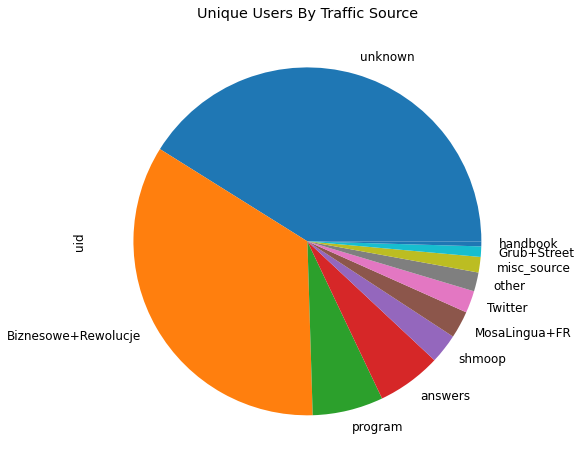

In [43]:
# create a pie chart 

df.groupby("major_source")['uid'].nunique().sort_values(ascending=False).plot.pie()
plt.title('Unique Users By Traffic Source')
plt.show()

In [44]:
# check daily active users by traffic source
users_by_source = df.groupby(['date','major_source'])['uid'].nunique().unstack()


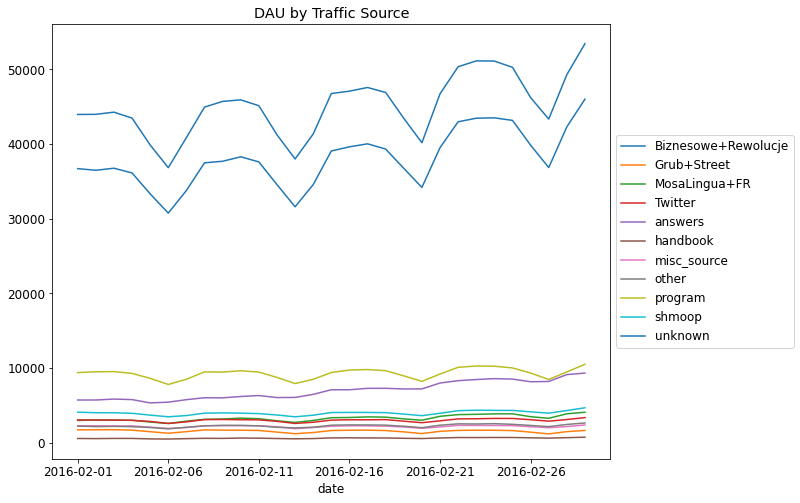

In [45]:
users_by_source.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('DAU by Traffic Source')
plt.show()

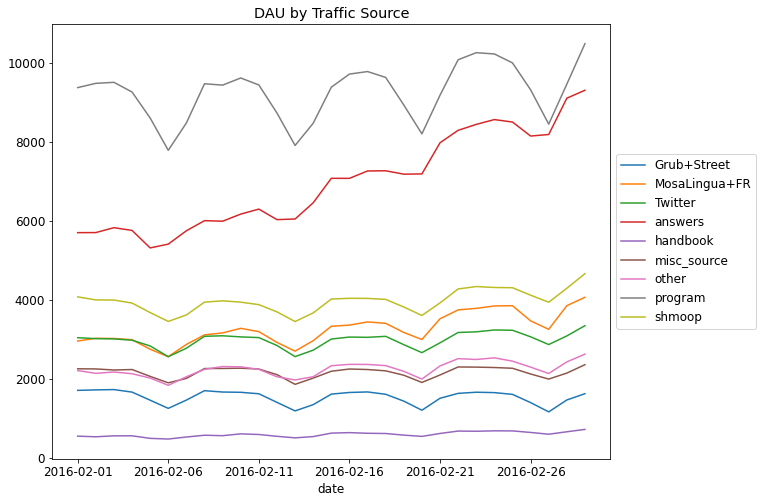

In [48]:
# look in detail about small sources
df[(df['major_source'] !='unknown') & (df['major_source']!='Biznesowe+Rewolucje')].groupby(['date','major_source'])['uid'].nunique().unstack().plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('DAU by Traffic Source')
plt.show()

Users from Biznesowe+Rewolucje, Unknown sources, and answers engaged with the app quite frequently. They are also the main users of the app. Users from program, and other sources have constant usage. 



### 4. Potential future analysis
This analysis focuses mainly on user growth. Aside from analyzing DAU and retention curve, we can also analyze the time spent by users. We can also analyze the demographics of users to better understand who are main users of Grammarly products and where we can acquire more similar users. 

Another aspect of focus can be on revenue growth. We can track conversion rate, Grammarly premium subscription renewal, and compare lifetime value to the cost of acquiring customers. we can conduct segment analysis, such as tracking which traffic sources are driving the most sales, or identifying top converting traffic sources.
